In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = pd.read_csv(r'D:\InternSavy\Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.drop(columns='CustomerID', inplace=True)

In [5]:
df.shape

(200, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.sample(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
4,Female,31,17,40
7,Female,23,18,94
187,Male,28,101,68
73,Female,60,50,56
14,Male,37,20,13
56,Female,51,44,50
188,Female,41,103,17
179,Male,35,93,90
67,Female,68,48,48
142,Female,28,76,40


In [10]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [11]:
df = df.rename(columns={'Genre': 'Gender'})

## Univariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

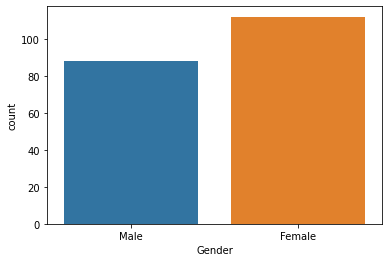

In [12]:
sns.countplot(df['Gender'])

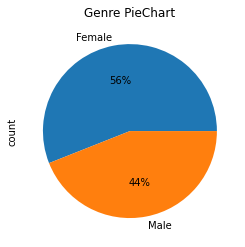

In [13]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%', title="Genre PieChart", figsize=(4,4))
plt.show()

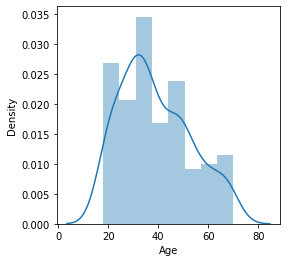

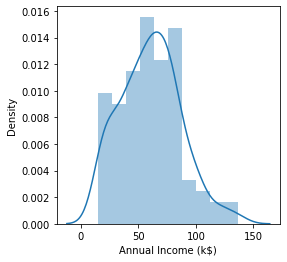

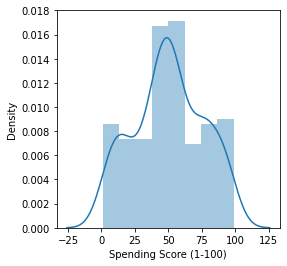

In [14]:
for column in df.columns:
    if df[column].dtype == 'int64':  # Check for 'int64' dtype
        plt.figure(figsize=(4, 4))
        sns.distplot(df[column])
        plt.show()

Text(0.5, 1.0, 'AGE BoxPlot')

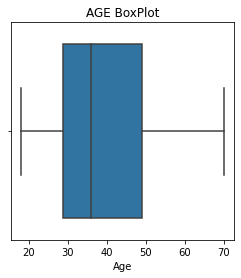

In [15]:
plt.figure(figsize=(4,4))
sns.boxplot(df['Age'])
plt.title("AGE BoxPlot")

In [16]:
print('maximum Annual Income',df['Annual Income (k$)'].max())
print('minimum Annual Income',df['Annual Income (k$)'].min())

maximum Annual Income 137
minimum Annual Income 15


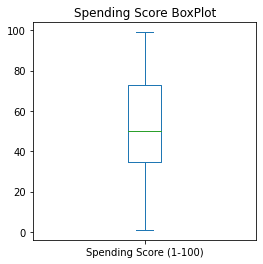

In [17]:
df['Spending Score (1-100)'].plot(kind='box', figsize=(4,4), title="Spending Score BoxPlot")
plt.show()

## Bi-variate Analysis

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

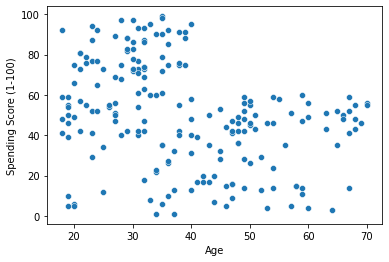

In [18]:
sns.scatterplot(data=df,x = 'Age',y = 'Spending Score (1-100)')

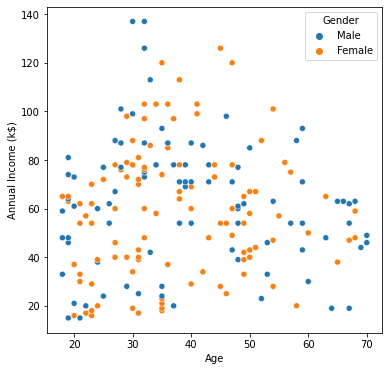

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df)
plt.show()

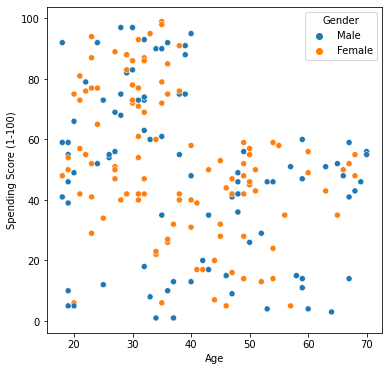

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df)
plt.show()

## Multi-Variate Analysis

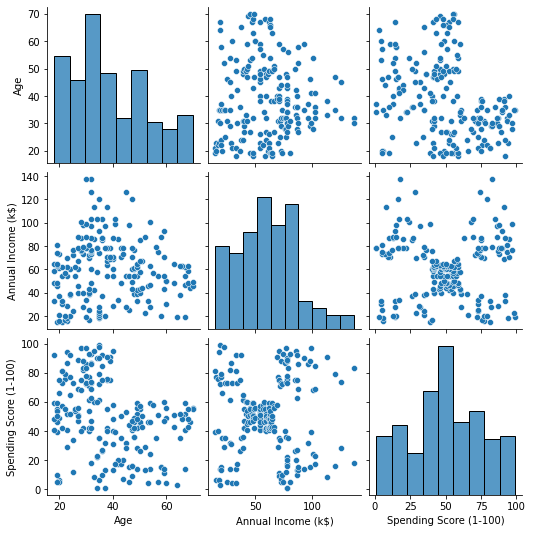

In [21]:
sns.pairplot(df)

In [23]:
from scipy import stats

In [24]:
male_scores = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_scores = df[df['Gender'] == 'Female']['Spending Score (1-100)']
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -0.8190464150660333
p-value: 0.4137446589852176
